In [8]:
# Install necessary libraries
#!pip install yfinance pandas
# This line ensures that plots are displayed inline within the notebook
%matplotlib inline

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_sharpe_ratio(tickers, start_date, end_date, risk_free_rate=0.01):
    # Download historical stock prices
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()
    
    # Calculate the mean and standard deviation of daily returns
    mean_daily_returns = daily_returns.mean()
    std_daily_returns = daily_returns.std()
    
    # Calculate the annualized Sharpe ratio
    sharpe_ratios = (mean_daily_returns - risk_free_rate / 252) / std_daily_returns * np.sqrt(252)
    
    return sharpe_ratios

# Define parameters
tickers = ['AAPL', 'MSFT', 'GOOGL','SPY','MCK', 'MCD']  # Example tickers
start_date = '2024-01-01'
end_date = '2024-08-01'
risk_free_rate = 0.01  # Example risk-free rate (1%)

# Calculate Sharpe ratios
sharpe_ratios = calculate_sharpe_ratio(tickers, start_date, end_date, risk_free_rate)

print(sharpe_ratios)


[*********************100%%**********************]  6 of 6 completed

Ticker
AAPL     1.384178
GOOGL    1.433884
MCD     -0.930140
MCK      2.951982
MSFT     1.139129
SPY      2.424907
dtype: float64


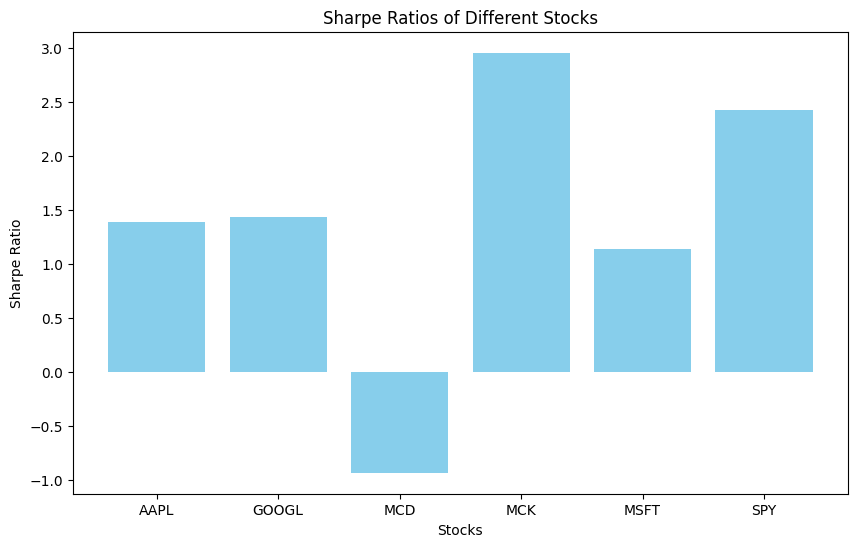

In [9]:
# Convert the Sharpe ratios to a dictionary
sharpe_ratios_dict = sharpe_ratios.to_dict()

# Extract keys and values
stocks = list(sharpe_ratios_dict.keys())
values = list(sharpe_ratios_dict.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(stocks, values, color='skyblue')

# Add titles and labels
plt.title('Sharpe Ratios of Different Stocks')
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')

# Show the chart
plt.show()